In [1]:
import os
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [2]:
os.chdir('drive/My Drive/Complete_time_series/Smooting_Techniques')

In [4]:
!ls data

us_airline_carrier_passenger.csv


In [5]:
# import necessary librareis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [6]:
# load data and preprocessing
df = pd.read_csv('data/us_airline_carrier_passenger.csv')
df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       240 non-null    object
 1   passengers  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [8]:
df['month'] = pd.to_datetime(df['month'])
df.dtypes

month         datetime64[ns]
passengers             int64
dtype: object

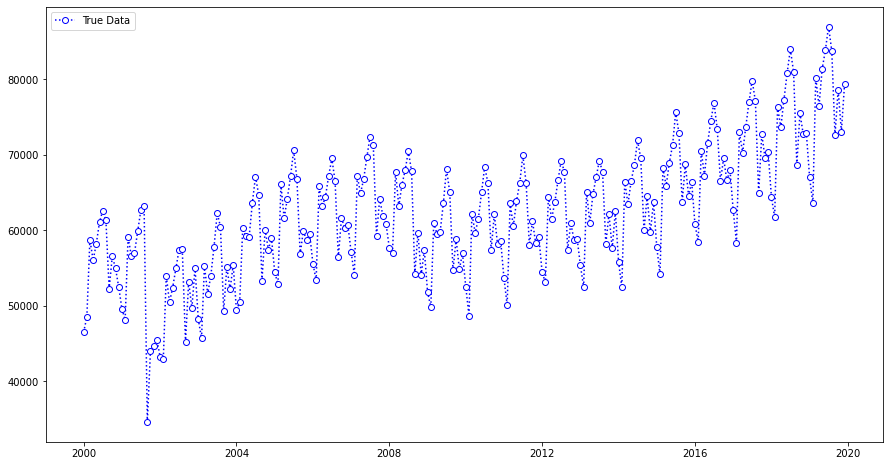

In [15]:
# visualzation
plt.figure(figsize=(15,8))
plt.plot(df['month'],df['passengers'],'bo:',markerfacecolor='w')

plt.legend(['True Data'])
plt.show()

In [21]:
# train (upto 2016 Dec)
# test (rest)
date = '2016-12-01'
df_train = df[df['month'] <= datetime.datetime.strptime(date,'%Y-%m-%d')]
df_test = df[df['month'] > datetime.datetime.strptime(date,'%Y-%m-%d')]

In [20]:
df_train.tail()

,month,passengers
199,2016-08-01,73450
200,2016-09-01,66477
201,2016-10-01,69539
202,2016-11-01,66591
203,2016-12-01,67983


In [22]:
df_test.head()

,month,passengers
204,2017-01-01,62621
205,2017-02-01,58377
206,2017-03-01,72962
207,2017-04-01,70262
208,2017-05-01,73679


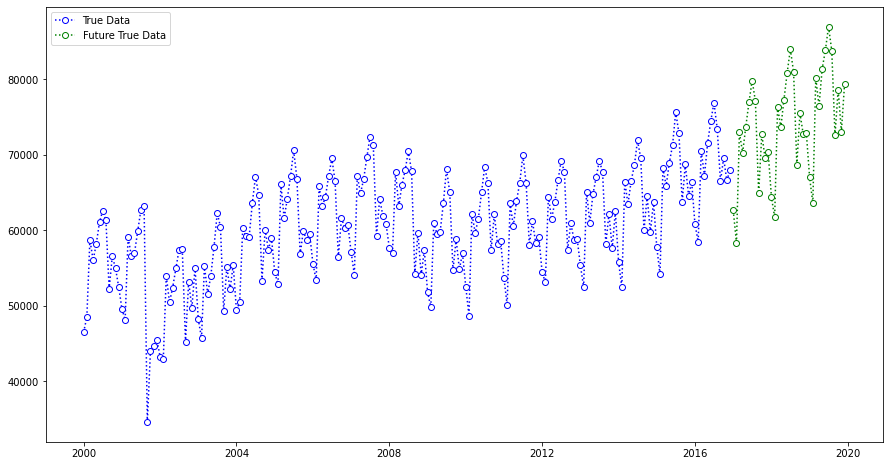

In [25]:
# visualzation
plt.figure(figsize=(15,8))
plt.plot(df_train['month'],df_train['passengers'],'bo:',markerfacecolor='w')
plt.plot(df_test['month'],df_test['passengers'],'go:',markerfacecolor='w')

plt.legend(['True Data','Future True Data'])
plt.show()

# Naive Forecasting Model

> $ Y_{t+1} = Y_t $

In [27]:
df_train['fitted_values'] = df_train['passengers'].shift()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_train.head()

,month,passengers,fitted_values
0,2000-01-01,46492,NaN
1,2000-02-01,48526,46492.0
2,2000-03-01,58764,48526.0
3,2000-04-01,56033,58764.0
4,2000-05-01,58201,56033.0


In [29]:
df_train.tail()

,month,passengers,fitted_values
199,2016-08-01,73450,76886.0
200,2016-09-01,66477,73450.0
201,2016-10-01,69539,66477.0
202,2016-11-01,66591,69539.0
203,2016-12-01,67983,66591.0


In [32]:
df_test['forecast'] = 67983
df_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,month,passengers,forecast
204,2017-01-01,62621,67983
205,2017-02-01,58377,67983
206,2017-03-01,72962,67983
207,2017-04-01,70262,67983
208,2017-05-01,73679,67983


In [36]:
# margin of error
error = df_train['passengers'] - df_train['fitted_values']
me = 1.96*error.std() # 95% ME

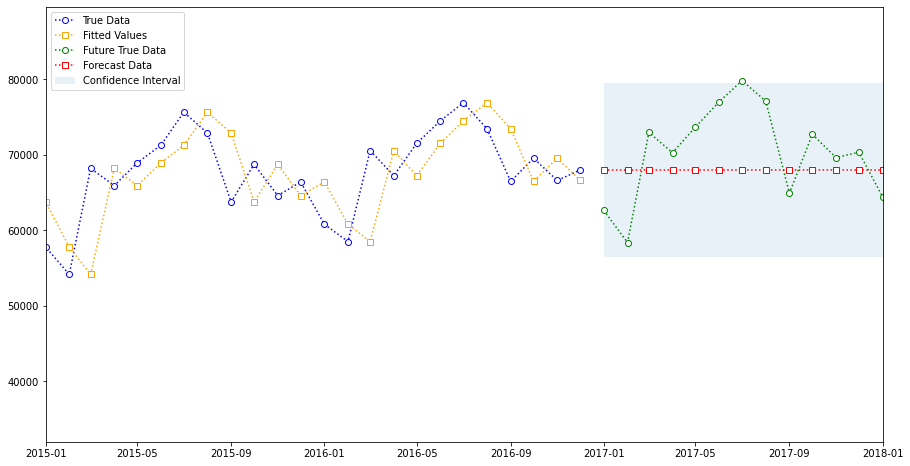

In [41]:
# visualzation
plt.figure(figsize=(15,8))
plt.plot(df_train['month'],df_train['passengers'],'bo:',markerfacecolor='w')
# fitted values
plt.plot(df_train['month'],df_train['fitted_values'],'s:',color='orange',markerfacecolor='w')


plt.plot(df_test['month'],df_test['passengers'],'go:',markerfacecolor='w')
# forecasting
plt.plot(df_test['month'],df_test['forecast'],'s:',color='red',markerfacecolor='w')

# Fill confidence interval
plt.fill_between(df_test['month'],(df_test['forecast']+me),(df_test['forecast']-me),alpha=0.1)
plt.legend(['True Data','Fitted Values','Future True Data','Forecast Data','Confidence Interval'])
# scalling
start_date = datetime.datetime.strptime("2015-01-01","%Y-%m-%d")
end_date = datetime.datetime.strptime("2018-01-01","%Y-%m-%d")
plt.axis(xmin=start_date,
         xmax=end_date)
plt.show()

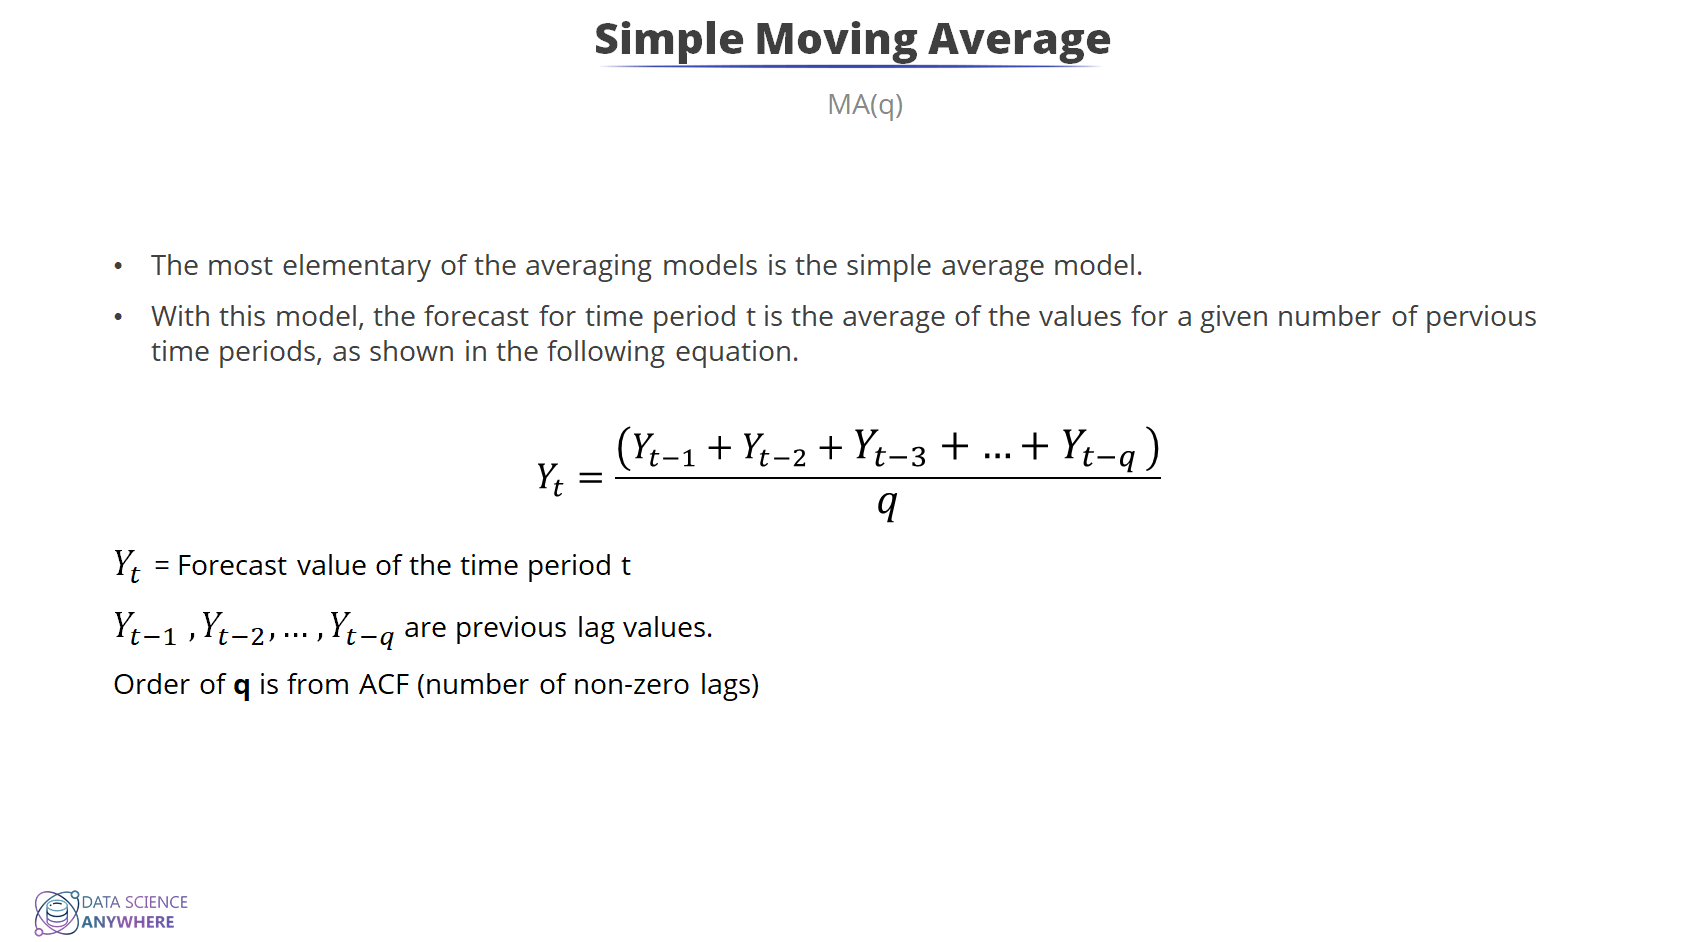

In [50]:
df_train_sma = df_train[['month','passengers']]
df_test_sma = df_test[['month','passengers']]

## SMA(3)

In [51]:
df_train_sma.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [56]:
df_train_sma['fitted_3'] = df_train_sma.rolling(window=3).mean() # mean, median, std, var

In [60]:
df_train_sma.tail()

,month,passengers,fitted_3
199,2016-08-01,73450,74946.000000
200,2016-09-01,66477,72271.000000
201,2016-10-01,69539,69822.000000
202,2016-11-01,66591,67535.666667
203,2016-12-01,67983,68037.666667


In [61]:
df_test_sma['forecast'] = 68037.666667

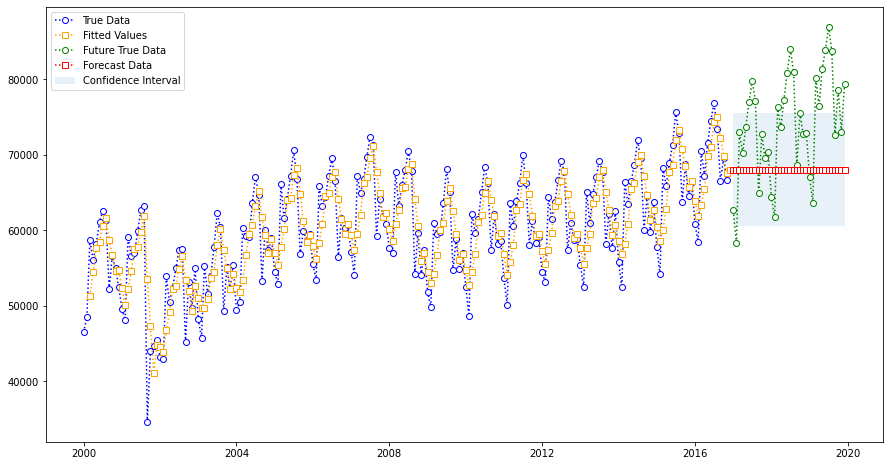

In [65]:
# margin of error
error_3 = df_train_sma['passengers'] - df_train_sma['fitted_3']
me_3 = 1.96*error_3.std() # 95% ME
# visualzation
plt.figure(figsize=(15,8))
plt.plot(df_train_sma['month'],df_train_sma['passengers'],'bo:',markerfacecolor='w')
# fitted values
plt.plot(df_train_sma['month'],df_train_sma['fitted_3'],'s:',color='orange',markerfacecolor='w')


plt.plot(df_test_sma['month'],df_test_sma['passengers'],'go:',markerfacecolor='w')
# forecasting
plt.plot(df_test_sma['month'],df_test_sma['forecast'],'s:',color='red',markerfacecolor='w')

# Fill confidence interval
plt.fill_between(df_test_sma['month'],(df_test_sma['forecast']+me_3),(df_test_sma['forecast']-me_3),alpha=0.1)
plt.legend(['True Data','Fitted Values','Future True Data','Forecast Data','Confidence Interval'])
# scalling
# start_date = datetime.datetime.strptime("2015-01-01","%Y-%m-%d")
# end_date = datetime.datetime.strptime("2018-01-01","%Y-%m-%d")
# plt.axis(xmin=start_date,
#          xmax=end_date)
plt.show()

# SMA (q)
-> q ACF

In [66]:
from statsmodels.graphics.tsaplots import plot_acf

In [67]:
difference = df_train_sma['passengers'].diff(1)

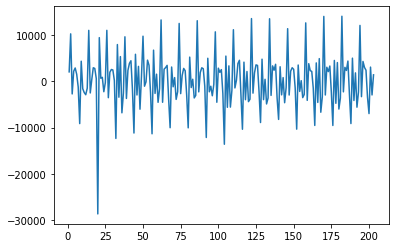

In [69]:
plt.plot(difference)

In [70]:
# remove the missing values
difference.dropna(inplace=True)

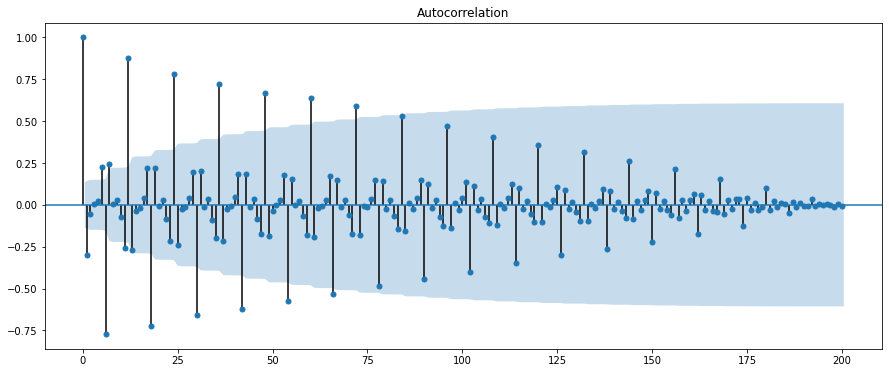

In [74]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_acf(difference,lags=200,ax=ax)

**According to acf we need to select at least 62 lags to forecast the future**

In [80]:
df_train_sma['fitted_62'] = df_train_sma['passengers'].rolling(window=62).mean()

In [82]:
df_train_sma.tail()

,month,passengers,fitted_3,fitted_62
199,2016-08-01,73450,74946.000000,63984.967742
200,2016-09-01,66477,72271.000000,63929.580645
201,2016-10-01,69539,69822.000000,63981.838710
202,2016-11-01,66591,67535.666667,64119.306452
203,2016-12-01,67983,68037.666667,64228.661290


In [83]:
df_test_sma['forecast_62'] = 64228.661290

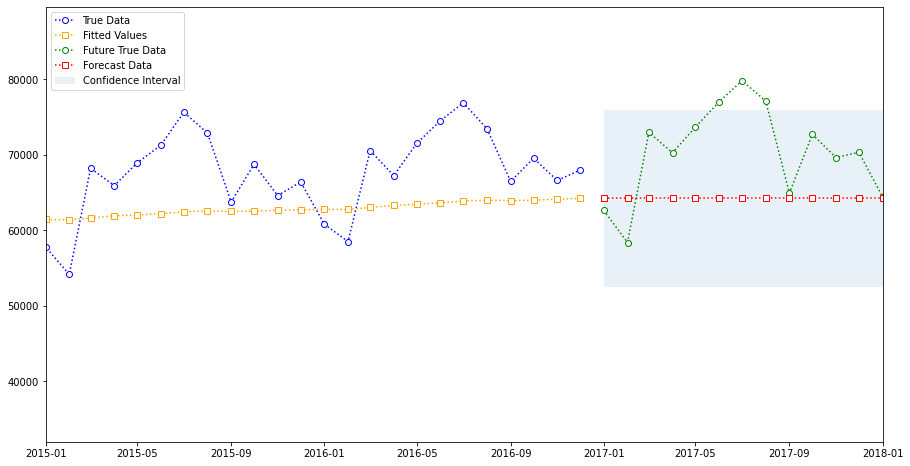

In [85]:
# margin of error
error_62 = df_train_sma['passengers'] - df_train_sma['fitted_62']
me_62 = 1.96*error_62.std() # 95% ME
# visualzation
plt.figure(figsize=(15,8))
plt.plot(df_train_sma['month'],df_train_sma['passengers'],'bo:',markerfacecolor='w')
# fitted values
plt.plot(df_train_sma['month'],df_train_sma['fitted_62'],'s:',color='orange',markerfacecolor='w')


plt.plot(df_test_sma['month'],df_test_sma['passengers'],'go:',markerfacecolor='w')
# forecasting
plt.plot(df_test_sma['month'],df_test_sma['forecast_62'],'s:',color='red',markerfacecolor='w')

# Fill confidence interval
plt.fill_between(df_test_sma['month'],(df_test_sma['forecast_62']+me_62),(df_test_sma['forecast_62']-me_62),alpha=0.1)
plt.legend(['True Data','Fitted Values','Future True Data','Forecast Data','Confidence Interval'])
# scalling
start_date = datetime.datetime.strptime("2015-01-01","%Y-%m-%d")
end_date = datetime.datetime.strptime("2018-01-01","%Y-%m-%d")
plt.axis(xmin=start_date,
         xmax=end_date)
plt.show()

---

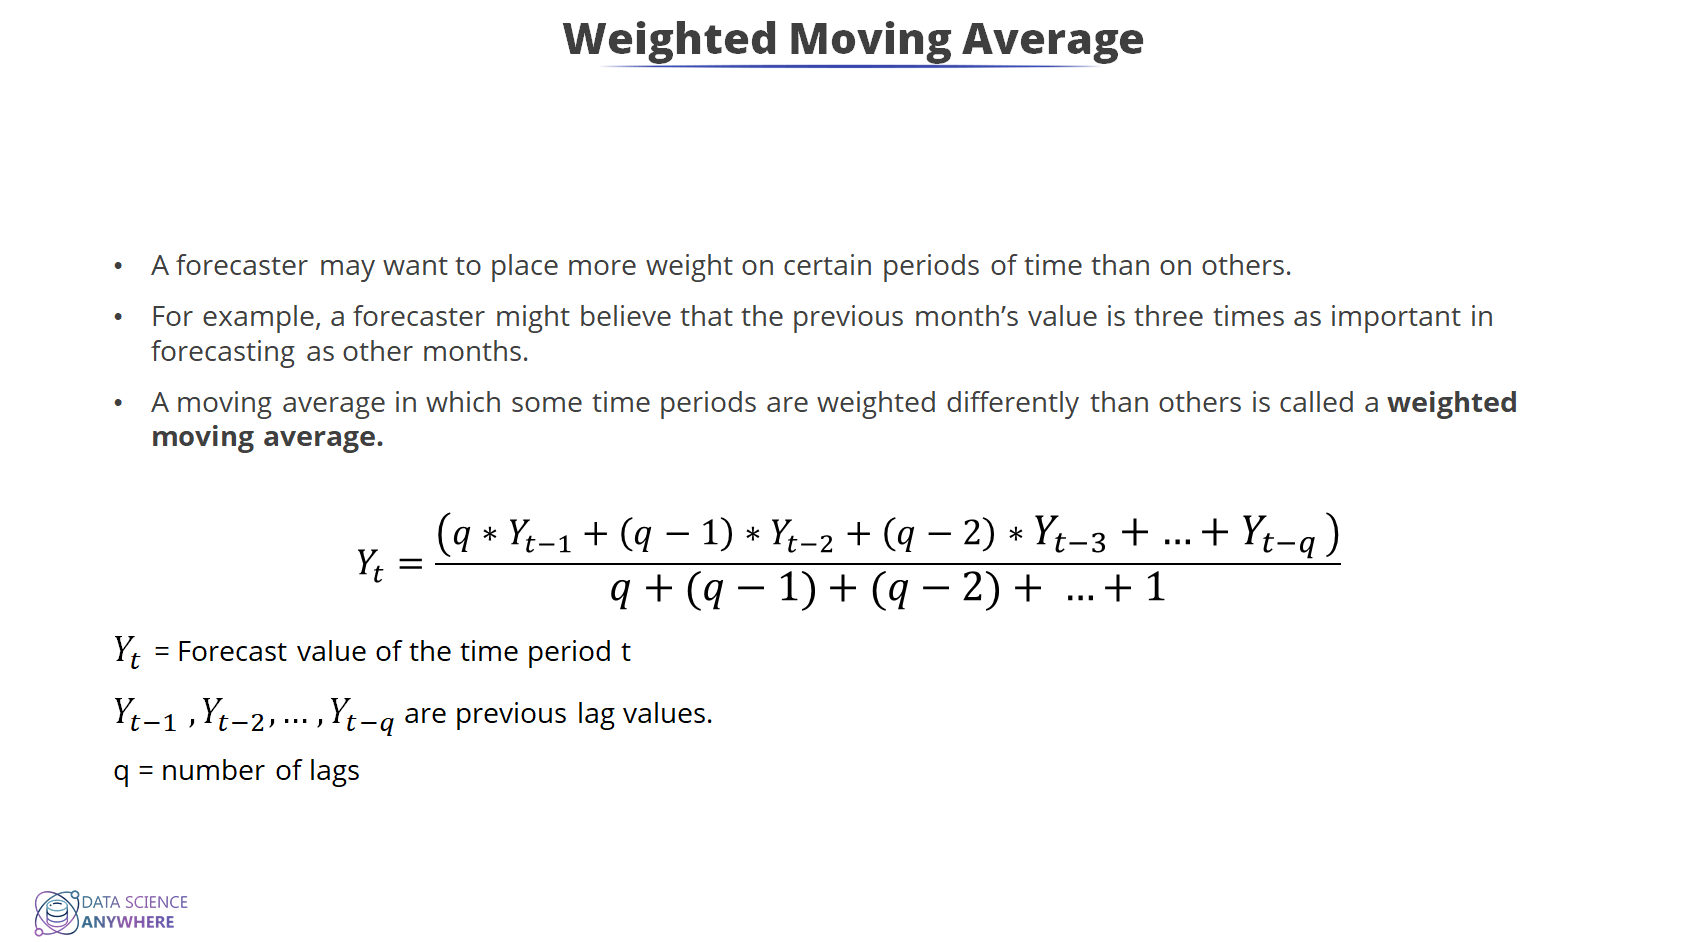

In [86]:
df_train_wma = df_train[['month','passengers']]
df_test_wma = df_test[['month','passengers']]

In [89]:
df_train_wma.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


**WMA(3)**

In [91]:
(3 * 58764 + 2 * 48526 + 1 * 46492)/(3+2+1)

53306.0

In [109]:
def weighted_moving_average(x):
  # x should in numpy array
  # generate weights
  #print(x)
  weights = np.arange(1,len(x)+1,+1)
  num = np.sum(x * weights)
  den = np.sum(weights)
  wma = num / den
  #print(wma)
  return wma

In [98]:
sample = df_train_wma.head()

In [103]:
sample

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [108]:
(3*58764 + 48526 * 2 +46492)/(6)

53306.0

In [106]:
sample['passengers'].rolling(window=3).apply(weighted_moving_average)

0    46492.0
1    48526.0
2    58764.0
dtype: float64
53306.0
1    48526.0
2    58764.0
3    56033.0
dtype: float64
55692.166666666664
2    58764.0
3    56033.0
4    58201.0
dtype: float64
57572.166666666664


0             NaN
1             NaN
2    53306.000000
3    55692.166667
4    57572.166667
Name: passengers, dtype: float64

In [110]:
# applying to entire data
df_train_wma['fitted_wma_3'] = df_train_wma['passengers'].rolling(window=3).apply(weighted_moving_average)
df_train_wma['fitted_wma_62'] = df_train_wma['passengers'].rolling(window=62).apply(weighted_moving_average)

In [111]:
df_train_wma.head()

,month,passengers,fitted_wma_3,fitted_wma_62
0,2000-01-01,46492,NaN,NaN
1,2000-02-01,48526,NaN,NaN
2,2000-03-01,58764,53306.000000,NaN
3,2000-04-01,56033,55692.166667,NaN
4,2000-05-01,58201,57572.166667,NaN


In [112]:
df_train_wma.tail()

,month,passengers,fitted_wma_3,fitted_wma_62
199,2016-08-01,73450,74770.666667,65520.943164
200,2016-09-01,66477,70536.166667,65600.055300
201,2016-10-01,69539,69170.166667,65778.132104
202,2016-11-01,66591,67554.666667,65860.962622
203,2016-12-01,67983,67778.333333,65983.619560


In [113]:
df_test_wma['forecated_3'] = 67778.333333
df_test_wma['forecated_62'] = 65983.619560

**Plot with 62 lags**

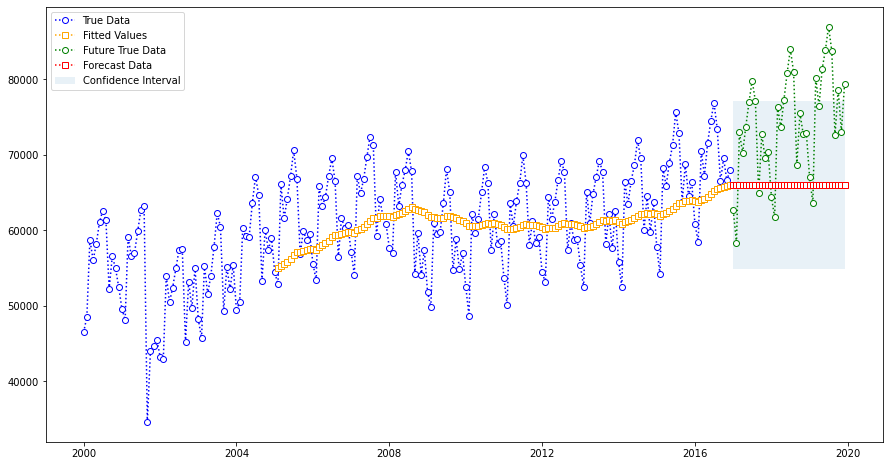

In [115]:
# margin of error
error_62 = df_train_wma['passengers'] - df_train_wma['fitted_wma_62']
me_62 = 1.96*error_62.std() # 95% ME
# visualzation
plt.figure(figsize=(15,8))
plt.plot(df_train_wma['month'],df_train_wma['passengers'],'bo:',markerfacecolor='w')
# fitted values
plt.plot(df_train_wma['month'],df_train_wma['fitted_wma_62'],'s:',color='orange',markerfacecolor='w')


plt.plot(df_test_wma['month'],df_test_wma['passengers'],'go:',markerfacecolor='w')
# forecasting
plt.plot(df_test_wma['month'],df_test_wma['forecated_62'],'s:',color='red',markerfacecolor='w')

# Fill confidence interval
plt.fill_between(df_test_wma['month'],(df_test_wma['forecated_62']+me_62),(df_test_wma['forecated_62']-me_62),alpha=0.1)
plt.legend(['True Data','Fitted Values','Future True Data','Forecast Data','Confidence Interval'])
# scalling
# start_date = datetime.datetime.strptime("2015-01-01","%Y-%m-%d")
# end_date = datetime.datetime.strptime("2018-01-01","%Y-%m-%d")
# plt.axis(xmin=start_date,
#          xmax=end_date)
plt.show()

---
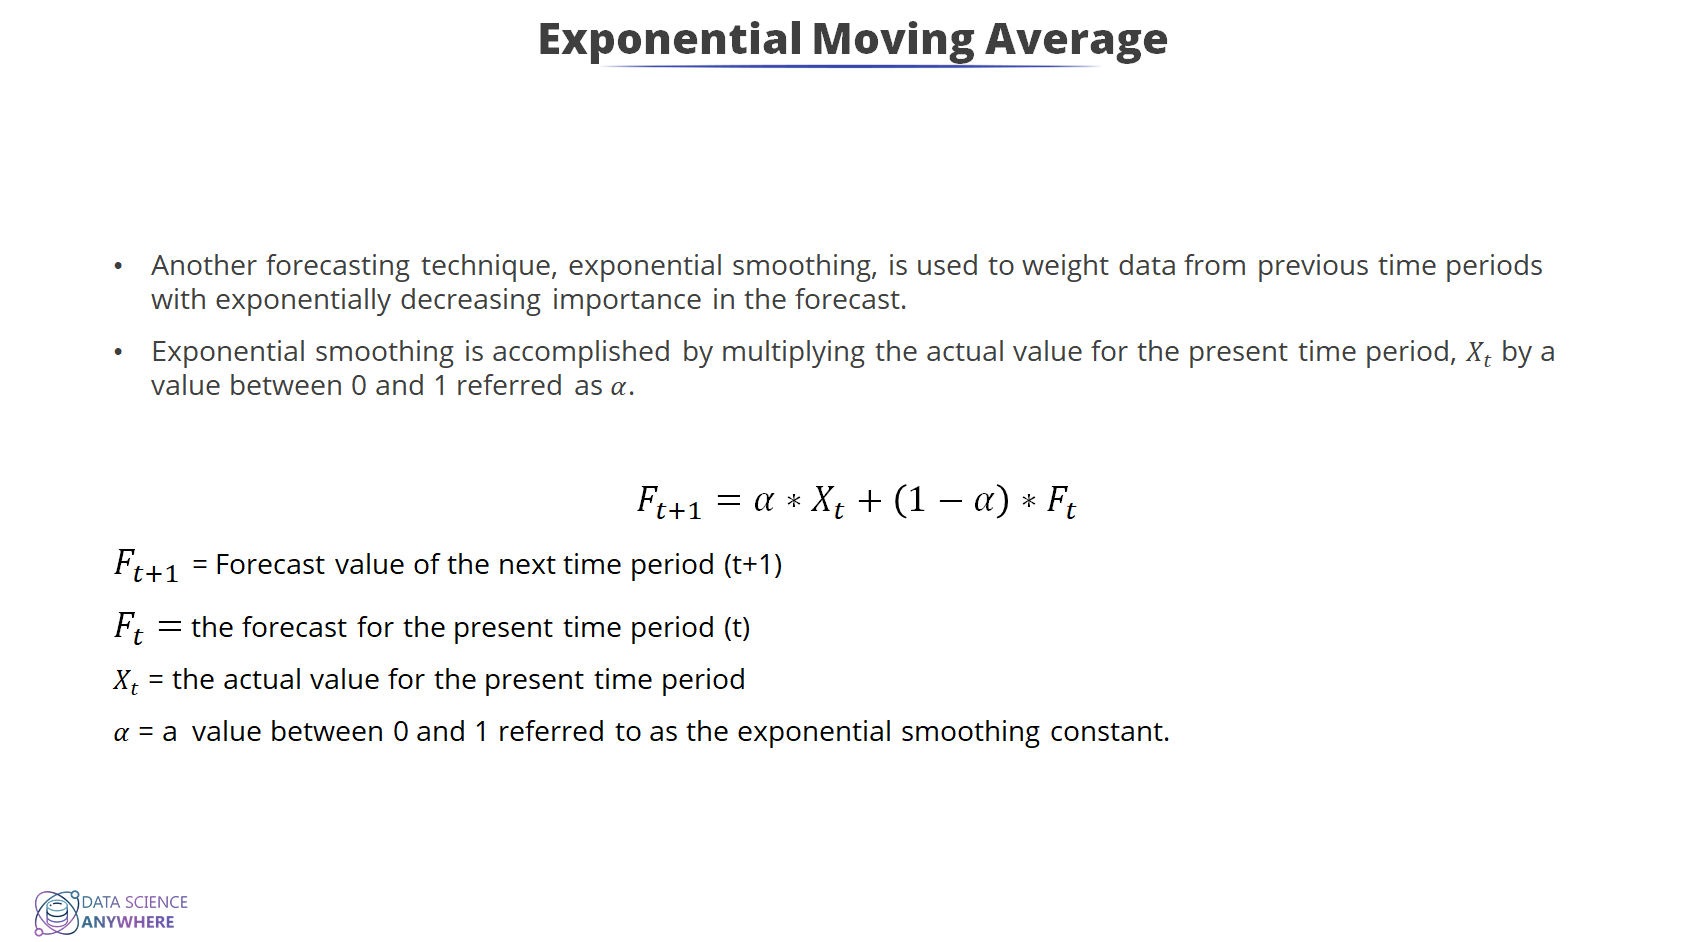

In [116]:
df_train_ema = df_train[['month','passengers']]
df_test_ema = df_test[['month','passengers']]

In [123]:
# ema
df_train_ema['fitted_3'] = df_train_ema['passengers'].ewm(min_periods=3,alpha=0.5).mean()

In [124]:
df_train_ema.head()

,month,passengers,fitted_3
0,2000-01-01,46492,NaN
1,2000-02-01,48526,NaN
2,2000-03-01,58764,54085.714286
3,2000-04-01,56033,55124.266667
4,2000-05-01,58201,56712.258065


In [125]:
df_train_ema.tail()

,month,passengers,fitted_3
199,2016-08-01,73450,73886.632073
200,2016-09-01,66477,70181.816036
201,2016-10-01,69539,69860.408018
202,2016-11-01,66591,68225.704009
203,2016-12-01,67983,68104.352005


In [126]:
df_test_ema['forecast_3_0.5'] = 68104.352005

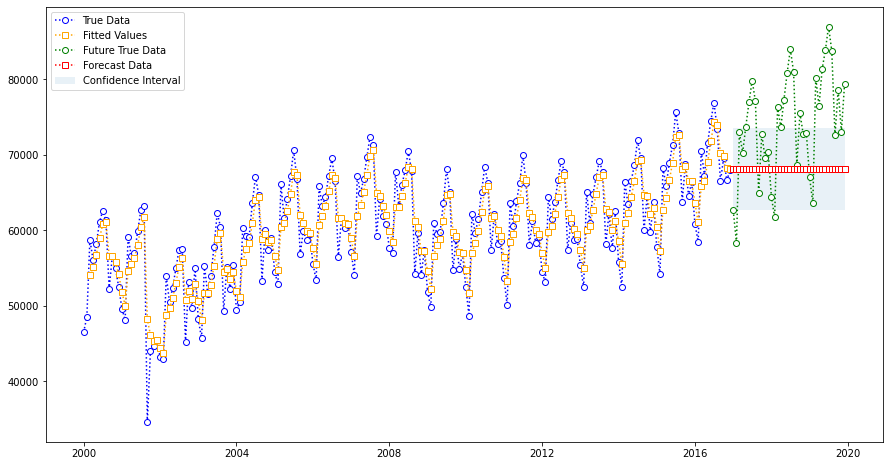

In [129]:
# margin of error
error_0_3 = df_train_ema['passengers'] - df_train_ema['fitted_3']
me_0_3 = 1.96*error_0_3.std() # 95% ME
# visualzation
plt.figure(figsize=(15,8))
plt.plot(df_train_ema['month'],df_train_ema['passengers'],'bo:',markerfacecolor='w')
# fitted values
plt.plot(df_train_ema['month'],df_train_ema['fitted_3'],'s:',color='orange',markerfacecolor='w')


plt.plot(df_test_ema['month'],df_test_ema['passengers'],'go:',markerfacecolor='w')
# forecasting
plt.plot(df_test_ema['month'],df_test_ema['forecast_3_0.5'],'s:',color='red',markerfacecolor='w')

# Fill confidence interval
plt.fill_between(df_test_ema['month'],(df_test_ema['forecast_3_0.5']+me_0_3),
                 (df_test_ema['forecast_3_0.5']-me_0_3),alpha=0.1)
plt.legend(['True Data','Fitted Values','Future True Data','Forecast Data','Confidence Interval'])
# scalling
# start_date = datetime.datetime.strptime("2015-01-01","%Y-%m-%d")
# end_date = datetime.datetime.strptime("2018-01-01","%Y-%m-%d")
# plt.axis(xmin=start_date,
#          xmax=end_date)
plt.show()